In [37]:
import re

import pandas as pd

In [38]:
LISTING_ENRICHED_FILE = "scraped/working/listings_data_enriched.csv"
LISTING_BASIC_FILE = "scraped/working/listings_data_basic.csv"

In [39]:
#df_original = pd.read_csv("scraped/sales_data.csv")
#df1 = pd.read_csv("../datacamp/listings_data_basic.csv")
df1 = pd.read_csv(LISTING_BASIC_FILE)
#df1 = df1.drop('Links','Address')
df1.head()

,ids,Links,Address,Description,Price,version,borough
0,102189851,https://www.rightmove.co.uk/properties/1021898...,"Roman House, Barbican, EC2Y",3 bedroom apartment for sale,3500000.0,v0007_170622,"('City of London', '5E61224')"
1,104489204,https://www.rightmove.co.uk/properties/1044892...,"High Street, Sutton",2 bedroom maisonette for sale,330000.0,v0007_170622,"('Sutton', '5E93974')"
2,104567108,https://www.rightmove.co.uk/properties/1045671...,"Breams Buildings, City, London, EC4A",1 bedroom flat for sale,630000.0,v0007_170622,"('City of London', '5E61224')"
3,104639057,https://www.rightmove.co.uk/properties/1046390...,"Dyer's Buildings, Holborn, EC1N",2 bedroom apartment for sale,1600000.0,v0007_170622,"('City of London', '5E61224')"
4,107158745,https://www.rightmove.co.uk/properties/1071587...,"Bramble Lodge, Wallington",1 bedroom retirement property for sale,169950.0,v0007_170622,"('Sutton', '5E93974')"


In [40]:
#df2 = pd.read_csv("../datacamp/listings_data_enriched.csv")
df2 = pd.read_csv(LISTING_ENRICHED_FILE)
df2.head()

,ids,version,link,Station_Prox,type,bedrooms,bathrooms,size,other_key_info,bullet_points,station_info,hold_type,short_description,long_description
0,123510599,v0001_130622,--,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85572123,v0001_130622,--,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85701084,v0001_130622,--,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,80180424,v0001_130622,--,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,96572116,v0001_130622,--,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_original = df1.merge(df2, left_on='ids',right_on='ids', suffixes=('_head','_indiv'))
df_original.head(20)

,ids,Links,Address,Description,Price,version_head,borough,version_indiv,link,Station_Prox,type,bedrooms,bathrooms,size,other_key_info,bullet_points,station_info,hold_type,short_description,long_description
0,102189851,https://www.rightmove.co.uk/properties/1021898...,"Roman House, Barbican, EC2Y",3 bedroom apartment for sale,3500000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/102189851,0.1,Apartment,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,104567108,https://www.rightmove.co.uk/properties/1045671...,"Breams Buildings, City, London, EC4A",1 bedroom flat for sale,630000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/104567108,0.2,Flat,1.0,1.0,469 sq. ft.;(44 sq. m.),{},NaN,NaN,NaN,NaN,NaN
2,104639057,https://www.rightmove.co.uk/properties/1046390...,"Dyer's Buildings, Holborn, EC1N",2 bedroom apartment for sale,1600000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/104639057,0.1,Apartment,2.0,2.0,786 sq. ft.;(73 sq. m.),NaN,NaN,NaN,NaN,NaN,NaN
3,107158745,https://www.rightmove.co.uk/properties/1071587...,"Bramble Lodge, Wallington",1 bedroom retirement property for sale,169950.0,v0007_170622,"('Sutton', '5E93974')",v0007_170622,https://www.rightmove.co.uk/properties/107158745,0.4,Retirement Property,1.0,1.0,NaN,NaN,One bedroom first floor apartment;Fantastic or...,"[(0.4, 'Wallington Station', 'svg-nationalrail...",Tenure: Leasehold,Read more,Stratton and King are delighted to be marketin...
4,109078397,https://www.rightmove.co.uk/properties/1090783...,"Liverpool Street, Liverpool Street",2 bedroom apartment for sale,POA,NaN,NaN,v0006_160622,https://www.rightmove.co.uk/properties/109078397,0.0,Apartment,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,109078397,https://www.rightmove.co.uk/properties/1090783...,"Liverpool Street, Liverpool Street",2 bedroom apartment for sale,POA,NaN,NaN,v0007_170622,https://www.rightmove.co.uk/properties/109078397,0.0,Apartment,2.0,2.0,NaN,NaN,Apartment;2 Beds;1 Reception;2 Bathrooms;Showe...,"[(0.0, 'Liverpool Street Station', 'svg-nation...",NaN,Read more,Tenure: Please confirm if this is a freehold ...
6,109494014,https://www.rightmove.co.uk/properties/1094940...,"One Bishopsgate Plaza, City of London, EC2A",2 bedroom apartment for sale,1990000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/109494014,0.1,Apartment,2.0,2.0,NaN,{},NaN,NaN,NaN,NaN,NaN
7,109494014,https://www.rightmove.co.uk/properties/1094940...,"One Bishopsgate Plaza, City of London, EC2A",2 bedroom apartment for sale,1990000.0,v0007_170622,"('City of London', '5E61224')",v0007_170622,https://www.rightmove.co.uk/properties/109494014,0.1,Apartment,2.0,2.0,NaN,NaN,Gym;Swimming pool;Shops and amenities nearby;C...,"[(0.1, 'Liverpool Street Station', 'svg-nation...",Tenure: Leasehold,Read more,A sought after South East facing double aspect...
8,109744331,https://www.rightmove.co.uk/properties/1097443...,"The Heron, Moorgate, London, EC2Y",Studio flat for sale,595000.0,v0007_170622,"('City of London', '5E61224')",v0001_130622,--,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,109744331,https://www.rightmove.co.uk/properties/1097443...,"The Heron, Moorgate, London, EC2Y",Studio flat for sale,595000.0,v0007_170622,"('City of London', '5E61224')",v0003_140622,https://www.rightmove.co.uk/properties/109744331,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
m = re.finditer(r'.*?(spark).*?', "I'm searching for a spark in PySpark", re.I)
for match in m:
    print(match)

<re.Match object; span=(0, 25), match="I'm searching for a spark">
<re.Match object; span=(25, 36), match=' in PySpark'>


In [43]:
#status_pattern = r'\s(\d{2})\s'

In [44]:
# m = re.finditer(r'.*?(spark).*?', df_original["Address"], re.I)
# for match in m:
#     print(match)

In [45]:
# df_original['titles'] = df_original['Address'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()
# df_original['titles1'] = df_original['Address'].str.split('(', 1).str[0].str.strip()
# df_original['titles2'] = df_original['Address'].str.replace(r'\([^)]*\)', '').str.strip()
# df_original['bedrooms'] = df_original['Address'].str.extract('(bedroom)')
# df_original

In [46]:
#df_original = pd.read_csv("scraped/sales_data.csv")
#df_original["bedroom_count"] = df_original["Description"].str[0]
#df_original['bedrooms'] = df_original['Description'].str.extract('(\d) bedroom')
df_original['bedrooms'] = df_original['Description'].str.extract('(\d) bedroom').astype('float')
df_original['postcode'] = df_original["Address"].str.extract("([A-Z]{1,2}\d[A-Z\d]? ?\d[A-Z]{2}|[A-Z]{1,2}\d[A-Z\d]?)")
df_original['type'] = df_original["Description"].str.extract("(house|apartment|flat|maisonette)")
df_original['compass'] = df_original["postcode"].str[0:2]
df_original['sq_ft'] = df_original["size"].str.extract("(\d*) sq. ft.")

df_original['hold_type2'] = df_original["hold_type"].str.replace("Tenure:","").str.strip()
#df_original['type'] = df_original["Description"].str.extract("(house|apartment|flat|maisonette|property)")
df_original.head(20)

,ids,Links,Address,Description,Price,version_head,borough,version_indiv,link,Station_Prox,...,other_key_info,bullet_points,station_info,hold_type,short_description,long_description,postcode,compass,sq_ft,hold_type2
0,102189851,https://www.rightmove.co.uk/properties/1021898...,"Roman House, Barbican, EC2Y",3 bedroom apartment for sale,3500000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/102189851,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,EC2Y,EC,NaN,NaN
1,104567108,https://www.rightmove.co.uk/properties/1045671...,"Breams Buildings, City, London, EC4A",1 bedroom flat for sale,630000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/104567108,0.2,...,{},NaN,NaN,NaN,NaN,NaN,EC4A,EC,469,NaN
2,104639057,https://www.rightmove.co.uk/properties/1046390...,"Dyer's Buildings, Holborn, EC1N",2 bedroom apartment for sale,1600000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/104639057,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,EC1N,EC,786,NaN
3,107158745,https://www.rightmove.co.uk/properties/1071587...,"Bramble Lodge, Wallington",1 bedroom retirement property for sale,169950.0,v0007_170622,"('Sutton', '5E93974')",v0007_170622,https://www.rightmove.co.uk/properties/107158745,0.4,...,NaN,One bedroom first floor apartment;Fantastic or...,"[(0.4, 'Wallington Station', 'svg-nationalrail...",Tenure: Leasehold,Read more,Stratton and King are delighted to be marketin...,NaN,NaN,NaN,Leasehold
4,109078397,https://www.rightmove.co.uk/properties/1090783...,"Liverpool Street, Liverpool Street",2 bedroom apartment for sale,POA,NaN,NaN,v0006_160622,https://www.rightmove.co.uk/properties/109078397,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,109078397,https://www.rightmove.co.uk/properties/1090783...,"Liverpool Street, Liverpool Street",2 bedroom apartment for sale,POA,NaN,NaN,v0007_170622,https://www.rightmove.co.uk/properties/109078397,0.0,...,NaN,Apartment;2 Beds;1 Reception;2 Bathrooms;Showe...,"[(0.0, 'Liverpool Street Station', 'svg-nation...",NaN,Read more,Tenure: Please confirm if this is a freehold ...,NaN,NaN,NaN,NaN
6,109494014,https://www.rightmove.co.uk/properties/1094940...,"One Bishopsgate Plaza, City of London, EC2A",2 bedroom apartment for sale,1990000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/109494014,0.1,...,{},NaN,NaN,NaN,NaN,NaN,EC2A,EC,NaN,NaN
7,109494014,https://www.rightmove.co.uk/properties/1094940...,"One Bishopsgate Plaza, City of London, EC2A",2 bedroom apartment for sale,1990000.0,v0007_170622,"('City of London', '5E61224')",v0007_170622,https://www.rightmove.co.uk/properties/109494014,0.1,...,NaN,Gym;Swimming pool;Shops and amenities nearby;C...,"[(0.1, 'Liverpool Street Station', 'svg-nation...",Tenure: Leasehold,Read more,A sought after South East facing double aspect...,EC2A,EC,NaN,Leasehold
8,109744331,https://www.rightmove.co.uk/properties/1097443...,"The Heron, Moorgate, London, EC2Y",Studio flat for sale,595000.0,v0007_170622,"('City of London', '5E61224')",v0001_130622,--,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,EC2Y,EC,NaN,NaN
9,109744331,https://www.rightmove.co.uk/properties/1097443...,"The Heron, Moorgate, London, EC2Y",Studio flat for sale,595000.0,v0007_170622,"('City of London', '5E61224')",v0003_140622,https://www.rightmove.co.uk/properties/109744331,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,EC2Y,EC,NaN,NaN


In [47]:
#df_original['Target'] = df_original['Price'].fillna(0.0).str.replace('[£,]', '').replace('POA', 0.0).astype('float')
df_original.set_index("ids", inplace=True)
df_original = df_original[~df_original.index.duplicated(keep='last')]

df_original['Target'] = df_original['Price'].fillna(0.0)
df_original

,Links,Address,Description,Price,version_head,borough,version_indiv,link,Station_Prox,type,...,bullet_points,station_info,hold_type,short_description,long_description,postcode,compass,sq_ft,hold_type2,Target
ids,,,,,,,,,,,,,,,,,,,,,
102189851,https://www.rightmove.co.uk/properties/1021898...,"Roman House, Barbican, EC2Y",3 bedroom apartment for sale,3500000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/102189851,0.1,apartment,...,NaN,NaN,NaN,NaN,NaN,EC2Y,EC,NaN,NaN,3500000.0
104567108,https://www.rightmove.co.uk/properties/1045671...,"Breams Buildings, City, London, EC4A",1 bedroom flat for sale,630000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/104567108,0.2,flat,...,NaN,NaN,NaN,NaN,NaN,EC4A,EC,469,NaN,630000.0
104639057,https://www.rightmove.co.uk/properties/1046390...,"Dyer's Buildings, Holborn, EC1N",2 bedroom apartment for sale,1600000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/104639057,0.1,apartment,...,NaN,NaN,NaN,NaN,NaN,EC1N,EC,786,NaN,1600000.0
107158745,https://www.rightmove.co.uk/properties/1071587...,"Bramble Lodge, Wallington",1 bedroom retirement property for sale,169950.0,v0007_170622,"('Sutton', '5E93974')",v0007_170622,https://www.rightmove.co.uk/properties/107158745,0.4,NaN,...,One bedroom first floor apartment;Fantastic or...,"[(0.4, 'Wallington Station', 'svg-nationalrail...",Tenure: Leasehold,Read more,Stratton and King are delighted to be marketin...,NaN,NaN,NaN,Leasehold,169950.0
109078397,https://www.rightmove.co.uk/properties/1090783...,"Liverpool Street, Liverpool Street",2 bedroom apartment for sale,POA,NaN,NaN,v0007_170622,https://www.rightmove.co.uk/properties/109078397,0.0,apartment,...,Apartment;2 Beds;1 Reception;2 Bathrooms;Showe...,"[(0.0, 'Liverpool Street Station', 'svg-nation...",NaN,Read more,Tenure: Please confirm if this is a freehold ...,NaN,NaN,NaN,NaN,POA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96645682,https://www.rightmove.co.uk/properties/9664568...,"Jefton Court, Ross Road, Wallington, SM6",2 bedroom apartment for sale,285000.0,v0007_170622,"('Sutton', '5E93974')",v0007_170622,https://www.rightmove.co.uk/properties/96645682,0.2,apartment,...,Ideally situated for transport links;Ground fl...,"[(0.2, 'Wallington Station', 'svg-nationalrail...",Tenure: Leasehold,Read more,"This two bedroom, ground floor purpose built a...",SM6,SM,NaN,Leasehold,285000.0
96646042,https://www.rightmove.co.uk/properties/9664604...,"Buckland Way, Worcester Park, Surrey, KT4",2 bedroom terraced house for sale,425000.0,NaN,NaN,v0007_170622,https://www.rightmove.co.uk/properties/96646042,0.7,house,...,ENTRANCE HALLWAY;LOUNGE;UPSTAIRS BATHROOM;DOUB...,"[(0.7, 'Worcester Park Station', 'svg-national...",Tenure: Freehold,Read more,ENTRANCE HALLWAY\r Understairs meter storage c...,KT4,KT,NaN,Freehold,425000.0
96649792,https://www.rightmove.co.uk/properties/9664979...,"Langley Park Road, South Sutton",2 bedroom flat for sale,565000.0,v0007_170622,"('Sutton', '5E93974')",v0007_170622,https://www.rightmove.co.uk/properties/96649792,0.5,flat,...,10 year build guarantee;CCTV communal areas;Al...,"[(0.5, 'Sutton (Surrey) Station', 'svg-nationa...",NaN,Read more,Tenure: Please confirm if this is a freehold ...,NaN,NaN,NaN,NaN,565000.0


In [48]:
# method_uri_protocol_pattern = r'\"(\S+)\s(\S+)\s*(\S*)\"'
# method_uri_protocol = [re.search(method_uri_protocol_pattern, item).groups()
#                if re.search(method_uri_protocol_pattern, item)
#                else 'no match'
#               for item in sample_logs]
# method_uri_protocol

/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


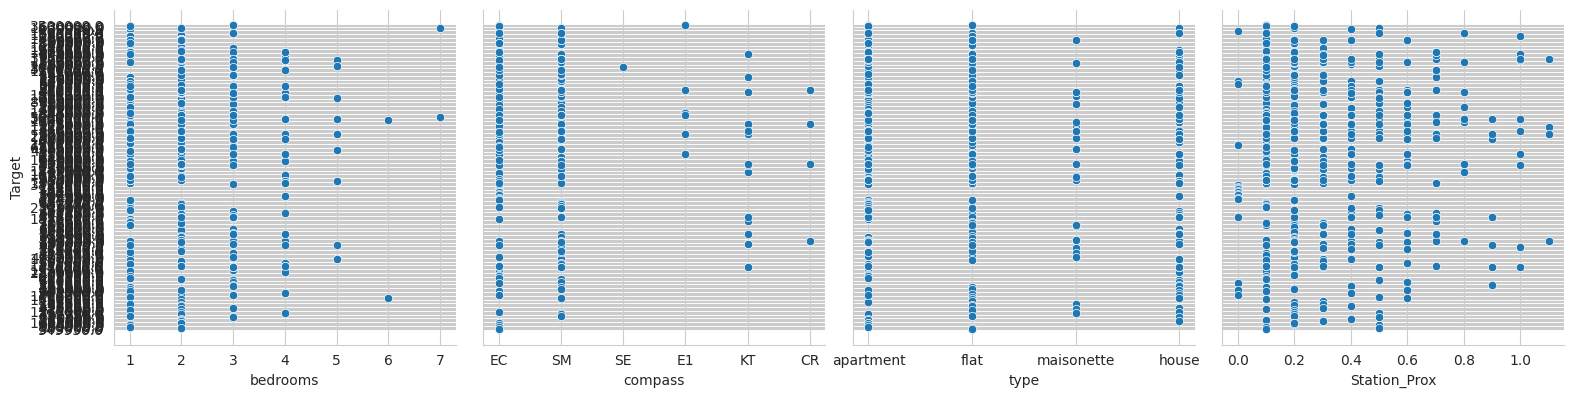

In [49]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
#sns.pairplot(df_original, x_vars=['bedrooms', 'postcode','type'],
sns.pairplot(df_original, x_vars=['bedrooms', 'compass','type','Station_Prox'],
             y_vars='Target', size=4, aspect=1, kind='scatter')
plt.show()

/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


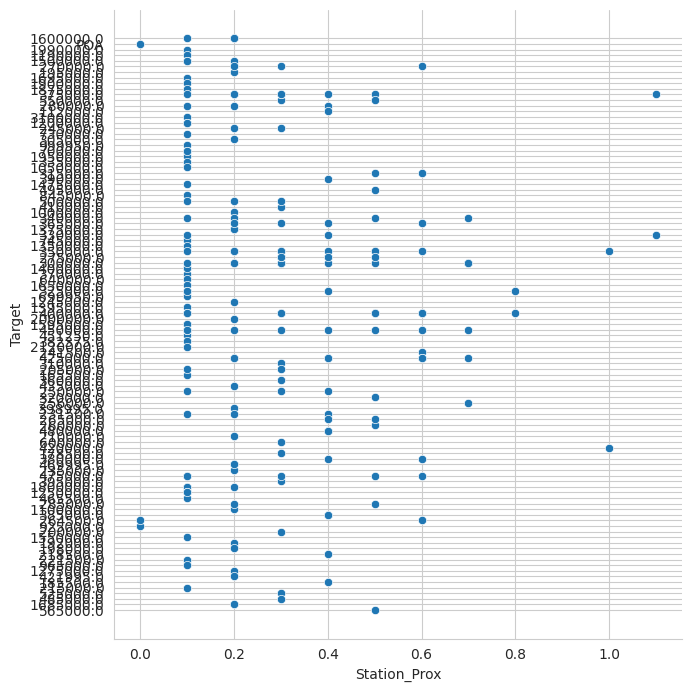

In [50]:
sns.pairplot(df_original[df_original['bedrooms'] == 2], x_vars=['Station_Prox'],
             y_vars='Target', size=7, aspect=1, kind='scatter')
plt.show()

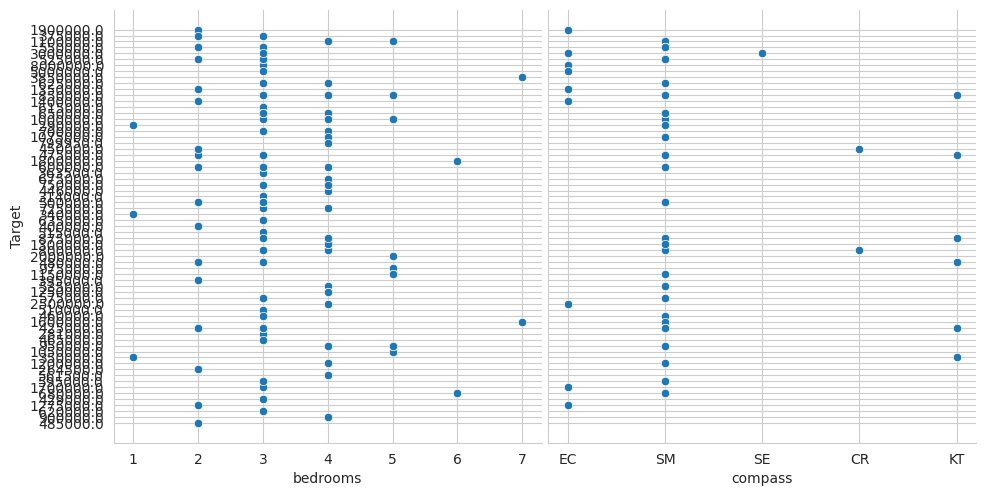

In [51]:
sns.pairplot(df_original[df_original["type"] == "house"], x_vars=['bedrooms', 'compass'],
             y_vars='Target', height=5, aspect=1, kind='scatter')
plt.show()

In [52]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 102189851 to 99839117
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Links              568 non-null    object 
 1   Address            568 non-null    object 
 2   Description        568 non-null    object 
 3   Price              568 non-null    object 
 4   version_head       516 non-null    object 
 5   borough            516 non-null    object 
 6   version_indiv      568 non-null    object 
 7   link               568 non-null    object 
 8   Station_Prox       568 non-null    float64
 9   type               545 non-null    object 
 10  bedrooms           531 non-null    float64
 11  bathrooms          526 non-null    float64
 12  size               72 non-null     object 
 13  other_key_info     46 non-null     object 
 14  bullet_points      376 non-null    object 
 15  station_info       422 non-null    object 
 16  hold_type    

In [53]:
df_original.describe()


,Station_Prox,bedrooms,bathrooms
count,568.000000,531.000000,526.000000
mean,0.320070,2.229755,1.416350
std,0.237087,1.124319,0.716897
min,0.000000,1.000000,1.000000
25%,0.100000,1.000000,1.000000
50%,0.200000,2.000000,1.000000
75%,0.500000,3.000000,2.000000
max,1.100000,7.000000,6.000000


array([[<AxesSubplot:title={'center':'Station_Prox'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>, <AxesSubplot:>]],
      dtype=object)

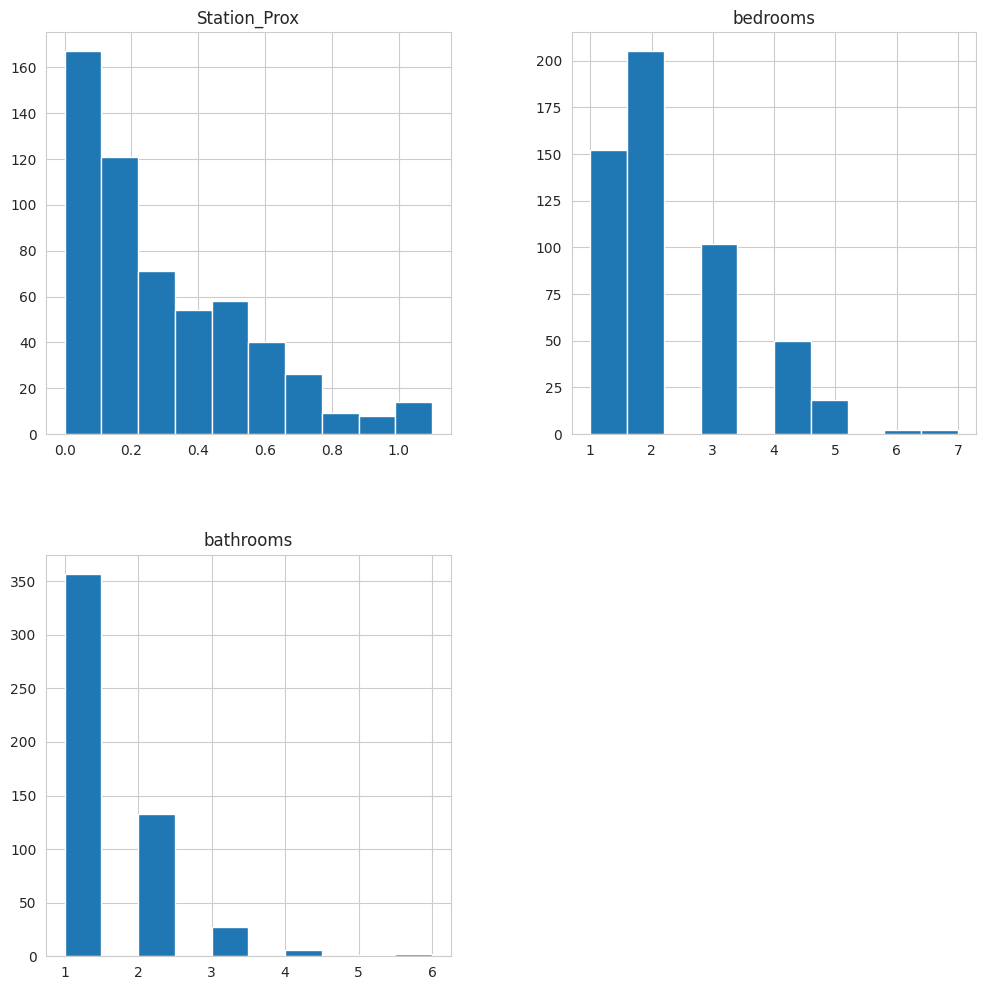

In [54]:
df_original.hist(figsize=(12,12))

array([[<AxesSubplot:title={'center':'Station_Prox'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>, <AxesSubplot:>]],
      dtype=object)

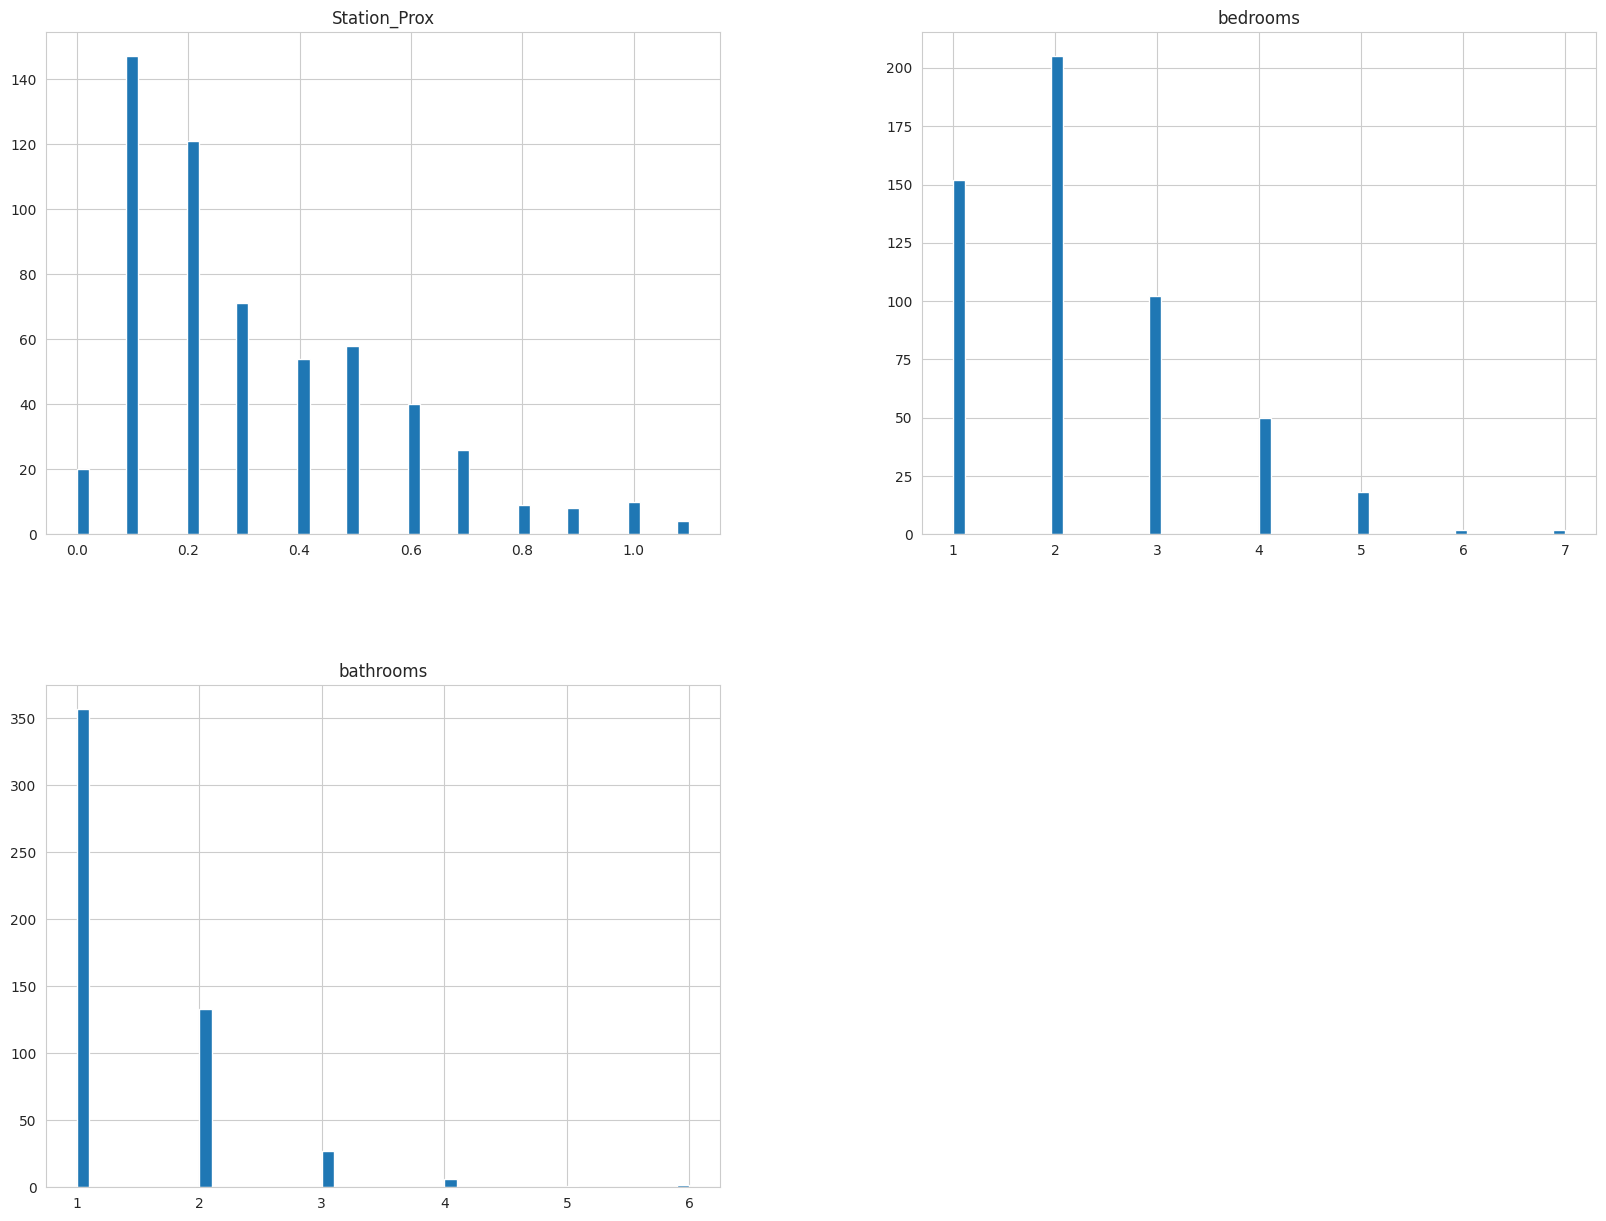

In [55]:
df_original.hist(bins=50, figsize=(20,15))

In [56]:
df_original["postcode"].value_counts()

SM6         32
SM1         31
EC2Y        26
SM2         25
EC4A        17
EC1A        17
EC3R        16
KT4         14
SM3         13
SM5         11
EC4V        10
EC2          8
E1           8
EC1N         7
SM6 7AX      6
EC3N         6
EC3A         5
EC2M         4
EC1          3
EC4Y         3
SM2 5LP      2
EC1M         2
CR4          2
SM5 3ES      1
EC1A 9LJ     1
SM5 1NZ      1
SM5 2LN      1
EC4V 3PS     1
SM2 5DJ      1
SM6 8TB      1
SM6 7GD      1
CR8          1
EC4          1
KT4 8QF      1
CR0          1
KT4 8HF      1
EC3A 7AB     1
SM6 8QP      1
EC4M         1
EC2N         1
SE1          1
SM5 2PS      1
EC2A         1
EC1V         1
Name: postcode, dtype: int64

In [57]:
df_original["type"].value_counts()

flat          181
apartment     167
house         166
maisonette     31
Name: type, dtype: int64

In [58]:
df_original.iloc[:,:-1].shape
df_original.iloc[:,-1].shape
df_original["Target"].shape

(568,)

In [59]:
df_original

,Links,Address,Description,Price,version_head,borough,version_indiv,link,Station_Prox,type,...,bullet_points,station_info,hold_type,short_description,long_description,postcode,compass,sq_ft,hold_type2,Target
ids,,,,,,,,,,,,,,,,,,,,,
102189851,https://www.rightmove.co.uk/properties/1021898...,"Roman House, Barbican, EC2Y",3 bedroom apartment for sale,3500000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/102189851,0.1,apartment,...,NaN,NaN,NaN,NaN,NaN,EC2Y,EC,NaN,NaN,3500000.0
104567108,https://www.rightmove.co.uk/properties/1045671...,"Breams Buildings, City, London, EC4A",1 bedroom flat for sale,630000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/104567108,0.2,flat,...,NaN,NaN,NaN,NaN,NaN,EC4A,EC,469,NaN,630000.0
104639057,https://www.rightmove.co.uk/properties/1046390...,"Dyer's Buildings, Holborn, EC1N",2 bedroom apartment for sale,1600000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/104639057,0.1,apartment,...,NaN,NaN,NaN,NaN,NaN,EC1N,EC,786,NaN,1600000.0
107158745,https://www.rightmove.co.uk/properties/1071587...,"Bramble Lodge, Wallington",1 bedroom retirement property for sale,169950.0,v0007_170622,"('Sutton', '5E93974')",v0007_170622,https://www.rightmove.co.uk/properties/107158745,0.4,NaN,...,One bedroom first floor apartment;Fantastic or...,"[(0.4, 'Wallington Station', 'svg-nationalrail...",Tenure: Leasehold,Read more,Stratton and King are delighted to be marketin...,NaN,NaN,NaN,Leasehold,169950.0
109078397,https://www.rightmove.co.uk/properties/1090783...,"Liverpool Street, Liverpool Street",2 bedroom apartment for sale,POA,NaN,NaN,v0007_170622,https://www.rightmove.co.uk/properties/109078397,0.0,apartment,...,Apartment;2 Beds;1 Reception;2 Bathrooms;Showe...,"[(0.0, 'Liverpool Street Station', 'svg-nation...",NaN,Read more,Tenure: Please confirm if this is a freehold ...,NaN,NaN,NaN,NaN,POA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96645682,https://www.rightmove.co.uk/properties/9664568...,"Jefton Court, Ross Road, Wallington, SM6",2 bedroom apartment for sale,285000.0,v0007_170622,"('Sutton', '5E93974')",v0007_170622,https://www.rightmove.co.uk/properties/96645682,0.2,apartment,...,Ideally situated for transport links;Ground fl...,"[(0.2, 'Wallington Station', 'svg-nationalrail...",Tenure: Leasehold,Read more,"This two bedroom, ground floor purpose built a...",SM6,SM,NaN,Leasehold,285000.0
96646042,https://www.rightmove.co.uk/properties/9664604...,"Buckland Way, Worcester Park, Surrey, KT4",2 bedroom terraced house for sale,425000.0,NaN,NaN,v0007_170622,https://www.rightmove.co.uk/properties/96646042,0.7,house,...,ENTRANCE HALLWAY;LOUNGE;UPSTAIRS BATHROOM;DOUB...,"[(0.7, 'Worcester Park Station', 'svg-national...",Tenure: Freehold,Read more,ENTRANCE HALLWAY\r Understairs meter storage c...,KT4,KT,NaN,Freehold,425000.0
96649792,https://www.rightmove.co.uk/properties/9664979...,"Langley Park Road, South Sutton",2 bedroom flat for sale,565000.0,v0007_170622,"('Sutton', '5E93974')",v0007_170622,https://www.rightmove.co.uk/properties/96649792,0.5,flat,...,10 year build guarantee;CCTV communal areas;Al...,"[(0.5, 'Sutton (Surrey) Station', 'svg-nationa...",NaN,Read more,Tenure: Please confirm if this is a freehold ...,NaN,NaN,NaN,NaN,565000.0


In [60]:
#df_original.drop("Links")
df = df_original.copy()
df = df.drop(['Links','Address','Description','Price','postcode'], axis=1)
df = df.drop(['version_head','version_indiv','link','borough','other_key_info','bullet_points','station_info'], axis=1)
df = df.drop(['short_description','long_description','hold_type','size'], axis=1)
df.head(20)

,Station_Prox,type,bedrooms,bathrooms,compass,sq_ft,hold_type2,Target
ids,,,,,,,,
102189851,0.1,apartment,3.0,3.0,EC,NaN,NaN,3500000.0
104567108,0.2,flat,1.0,1.0,EC,469,NaN,630000.0
104639057,0.1,apartment,2.0,2.0,EC,786,NaN,1600000.0
107158745,0.4,NaN,1.0,1.0,NaN,NaN,Leasehold,169950.0
109078397,0.0,apartment,2.0,2.0,NaN,NaN,NaN,POA
109494014,0.1,apartment,2.0,2.0,EC,NaN,Leasehold,1990000.0
109744331,0.1,flat,NaN,NaN,EC,412,NaN,595000.0
109945103,0.1,apartment,2.0,2.0,EC,NaN,NaN,1190000.0
110820923,0.1,flat,1.0,NaN,SM,NaN,Share of Freehold,259950.0


In [61]:
for column in ['type','compass','hold_type2']:
    df = pd.concat([df,pd.get_dummies(df[column], prefix=column)],axis=1)
    # now drop the original column (you don't need it anymore)
    df.drop([column],axis=1, inplace=True)
df.head(20)

,Station_Prox,bedrooms,bathrooms,sq_ft,Target,type_apartment,type_flat,type_house,type_maisonette,compass_CR,compass_E1,compass_EC,compass_KT,compass_SE,compass_SM,hold_type2_Freehold,hold_type2_Leasehold,hold_type2_Share of Freehold
ids,,,,,,,,,,,,,,,,,,
102189851,0.1,3.0,3.0,NaN,3500000.0,1,0,0,0,0,0,1,0,0,0,0,0,0
104567108,0.2,1.0,1.0,469,630000.0,0,1,0,0,0,0,1,0,0,0,0,0,0
104639057,0.1,2.0,2.0,786,1600000.0,1,0,0,0,0,0,1,0,0,0,0,0,0
107158745,0.4,1.0,1.0,NaN,169950.0,0,0,0,0,0,0,0,0,0,0,0,1,0
109078397,0.0,2.0,2.0,NaN,POA,1,0,0,0,0,0,0,0,0,0,0,0,0
109494014,0.1,2.0,2.0,NaN,1990000.0,1,0,0,0,0,0,1,0,0,0,0,1,0
109744331,0.1,NaN,NaN,412,595000.0,0,1,0,0,0,0,1,0,0,0,0,0,0
109945103,0.1,2.0,2.0,NaN,1190000.0,1,0,0,0,0,0,1,0,0,0,0,0,0
110820923,0.1,1.0,NaN,NaN,259950.0,0,1,0,0,0,0,0,0,0,1,0,0,1


In [62]:
if False:
    df.dropna(inplace=True)
    df

In [63]:
X = df.drop(["Target"],axis=1)
y = df["Target"]
X,y

(           Station_Prox  bedrooms  bathrooms sq_ft  type_apartment  type_flat  \
 ids                                                                             
 102189851           0.1       3.0        3.0   NaN               1          0   
 104567108           0.2       1.0        1.0   469               0          1   
 104639057           0.1       2.0        2.0   786               1          0   
 107158745           0.4       1.0        1.0   NaN               0          0   
 109078397           0.0       2.0        2.0   NaN               1          0   
 ...                 ...       ...        ...   ...             ...        ...   
 96645682            0.2       2.0        1.0   NaN               1          0   
 96646042            0.7       2.0        1.0   NaN               0          0   
 96649792            0.5       2.0        2.0   NaN               0          1   
 96654763            0.4       3.0        1.0   NaN               0          0   
 99839117       

# Exploratory Analysis

In [64]:
### does this work? it seems slow
'''for each in df_original.columns[:2]:
    x = df_original.plot(kind='scatter',x=each, y="Target")
    plt.show()
    #print (each)'''

'for each in df_original.columns[:2]:\n    x = df_original.plot(kind=\'scatter\',x=each, y="Target")\n    plt.show()\n    #print (each)'

In [66]:
### does this work? it doesn't seem to
'''import numpy as np
for each in df_original.columns:
    print(each)

x = df_original.plot(kind='scatter',x='bedrooms', y="Target")
plt.yticks(np.arange(min(x), max(x)+1, 1000))
plt.show()
'''

'import numpy as np\nfor each in df_original.columns:\n    print(each)\n\nx = df_original.plot(kind=\'scatter\',x=\'bedrooms\', y="Target")\nplt.yticks(np.arange(min(x), max(x)+1, 1000))\nplt.show()\n'

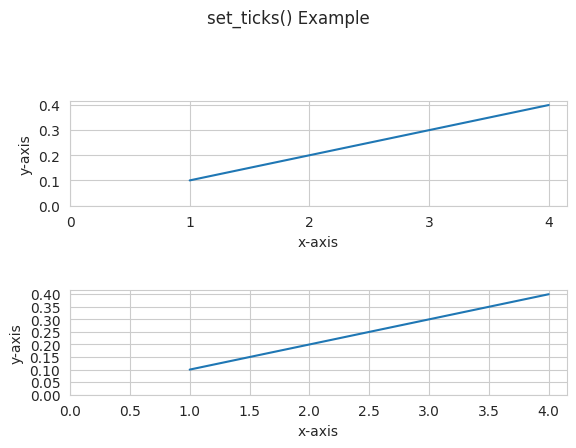

In [67]:
#  Code to change the interval of ticks of axes
# using set_ticks() method

# Importing libraries
import matplotlib.pyplot as plt
import numpy as np

# Creating x-value and y-value of data
x = [1, 2, 3, 4]
y = [0.1, 0.2, 0.3, 0.4]

# Creating a subplot with 2 row and 1 column
fig, (axes1, axes2) = plt.subplots(2, 1)

# Plotting first axes object i.e. axes1 and labeling
# its x and y axes
axes1.plot(x, y)
axes1.set_ylabel('y-axis')
axes1.set_xlabel('x-axis')

# Setting the interval of ticks of x-axis to 1 and of y-axis
# to 0.1 of first axes i.e. axes1.
axes1.xaxis.set_ticks(np.arange(0, 5, 1))
axes1.yaxis.set_ticks(np.arange(0, 0.5, 0.1))

# Plotting first axes object i.e. axes1 and labeling its
# x and y axes
axes2.plot(x, y)
axes2.set_ylabel('y-axis')
axes2.set_xlabel('x-axis')

# Setting the interval of ticks of x-axis to 0.5 and
# of y-axis to 0.05 of second axes i.e. axes2.
axes2.xaxis.set_ticks(np.arange(0, 4.5, 0.5))
axes2.yaxis.set_ticks(np.arange(0, 0.45, 0.05))


# Giving title to the figure object i.e. fig
fig.suptitle('set_ticks() Example')
fig.tight_layout(pad=3.0)

plt.show()

In [69]:
# also not working
'''df_original["Target"].describe()
xx.describe()
yy.dropna().describe()
df_original["Target"]'''

'df_original["Target"].describe()\nxx.describe()\nyy.dropna().describe()\ndf_original["Target"]'

                                                       Links  \
ids                                                            
102189851  https://www.rightmove.co.uk/properties/1021898...   
104567108  https://www.rightmove.co.uk/properties/1045671...   
104639057  https://www.rightmove.co.uk/properties/1046390...   
107158745  https://www.rightmove.co.uk/properties/1071587...   
109494014  https://www.rightmove.co.uk/properties/1094940...   

                                               Address  \
ids                                                      
102189851                  Roman House, Barbican, EC2Y   
104567108         Breams Buildings, City, London, EC4A   
104639057              Dyer's Buildings, Holborn, EC1N   
107158745                    Bramble Lodge, Wallington   
109494014  One Bishopsgate Plaza, City of London, EC2A   

                                      Description      Price  version_head  \
ids                                                               

/tmp/ipykernel_15268/2741292884.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Target'] = pd.to_numeric(subset["Target"], 'coerce').dropna().astype(int)


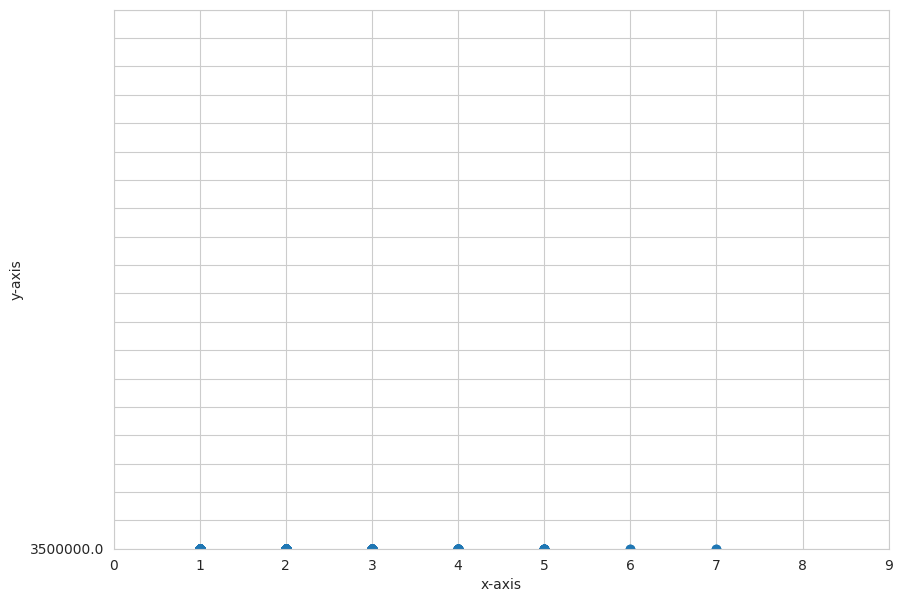

In [70]:
subset = df_original[df_original["Target"] != 'POA']
#subset = df_original[df_original[['Target']].apply(lambda x: x[0].isdigit(), axis=1)]
pd.to_numeric(subset["Target"], 'coerce').dropna().astype(int)

print(subset.head())
subset.describe()
df_original["Target"].value_counts()
df_original["Target"].dtypes
df_original.dtypes

#df_original["Target"] = df_original["Target"].astype("float")
#df_original.dtypes

pd.to_numeric(df_original["Target"], 'coerce').dropna().astype(int)

xx = subset['bedrooms']
yy = subset['Target']

xx,yy
subset['Target'] = pd.to_numeric(subset["Target"], 'coerce').dropna().astype(int)
subset['Target'].info()

# Creating a subplot with 2 row and 1 column
fig, (axes3) = plt.subplots(1, 1, figsize=(10,7))

# Plotting first axes object i.e. axes1 and labeling
# its x and y axes
axes3.scatter(xx, yy)
axes3.set_ylabel('y-axis')
axes3.set_xlabel('x-axis')

# Setting the interval of ticks of x-axis to 1 and of y-axis
# to 0.1 of first axes i.e. axes1.
axes3.xaxis.set_ticks(np.arange(0, 10, 1))
#axes3.yaxis.set_ticks(np.arange(0, 0.5, 0.1))
#axes3.yaxis.set_ticks([0,10])
axes3.yaxis.set_ticks(np.arange(0, 10000000,500000))

plt.show()